In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy.random as rnd
import seaborn as sns


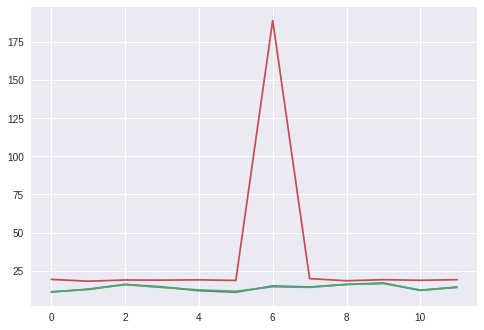

In [61]:
#graficamos los datos, tal cual los recibimos
nombres = ['tiempo_sol', 'tiempo_nublado', 'tiempo_lluvia']
datos = np.loadtxt('tiempos.txt')
sin_indice = datos[:,1:]
plt.plot(sin_indice) #hacemos un primer grafico de los datos, para darnos una idea
plt.show()


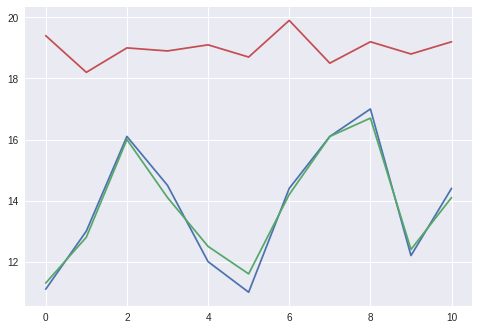

In [62]:
#santos picos batman! parece que tenemos un outlier!
#viendo que el pico no tiene ningun sentido, 
#puesto que un tiempo de 180 segundos en 100 metros llanos es ridiculo, decidimos ignorarlo en nuestro analisis

datos = np.delete(datos,6,0)
sin_indice = np.delete(sin_indice,6,0)

#luego, repetimos el primer grafico, para darnos una mejor idea de los datos



plt.clf()
plt.plot(sin_indice)
plt.show()


In [63]:
#son los atletas mas lentos en los dias de lluvia que en los dias soleados?

#para contestar esta pregunta, creemos que tiene sentido realizar un test de permutaciones,
#puesto que la pregunta que queremos responder es si verdaderamente el tag "tiempo_lluvia" y "tiempo_sol"
#brindan informacion

def hacerTestPermutaciones(a, b): #fucnion que hace el test de permutaciones, entre los valores en dos arrays
    delta0 = np.average(a) - np.average(b) #calcular el delta inicial (delta0)
    
    contador = 0
    limite = 10000 #cantidad de permutaciones a realizar
    perm = np.array([a,b]).flatten() #armamos un solo array, concatenando a y b
    diff = 0
    for i in range(limite):
        rnd.shuffle(perm) #mezclamos aleatoreamente los valores
        ap = perm[:len(a)] #a prima
        bp = perm[len(a):]#b prima
        delta = np.average(ap) - np.average(bp) #calculamos el delta entre a y b del etiquetado aleatorio
        if(delta > delta0):
            contador = contador + 1 #si la diferencia entre las etiquetas dio mayor a la incial, incrementamos en uno el contador
    return float(contador)/limite #finalmente, luego de calcular los delta de todas las permutaciones, retornamos el p-valor


tiempos_lluvia = datos[:,3]
tiempos_sol = datos[:,1]



print("El p-valor del test de permutaciones es: " + str(hacerTestPermutaciones(tiempos_lluvia,tiempos_sol)))

#como podemos ver, el p-valor nos dio 0 para este test, rechazando nuestra hipotesis nula, la cual en este caso seria
#"los tiempos de los corredores no son mayores en los dias de lluvia"
#por lo tanto, podemos afirmar que los datos indican que los tiempos de los corredores son mayores en dias lluviosos que
#en dias soleados



El p-valor del test de permutaciones es: 0.0


In [64]:
#para responder a la pregunta de si el clima nublado influye en el tiempo de los corredores, decidimos utilizar
#un t-test de valores apareados, el cual usaremos para comparar los tiempos en dias nublados contra los tiempos
#en otras condiciones climaticas

tiempos_nublado = datos[:,2]


print("el p-valor del t-test de valores apareados entre los tiempos en dias nublados y soleados es: " + str(st.ttest_rel(tiempos_nublado, tiempos_sol).pvalue))
print("el p-valor del t-test de valores apareados entre los tiempos en dias nublados y lluviosos es: " + str(st.ttest_rel(tiempos_nublado, tiempos_lluvia).pvalue))

#como podemos ver, el p-valor dio grande para el primer test y muy chico para el segundo, lo que nos dice
#que los tiempos en dias nublados y soleados estan fuertemente correlacionados
#y los tiempos en dias nublados contra los lluviosos, no lo estan

#con estos resultados podemos decir que el rendimiento de los atletas es similar en los dias nublados y soleados, pero
#no lo es en los dias lluviosos


el p-valor del t-test de valores apareados entre los tiempos en dias nublados y soleados es: 1.0
el p-valor del t-test de valores apareados entre los tiempos en dias nublados y lluviosos es: 3.77285476952e-06


In [65]:
#Es independiente la velocidad en los dias de lluvia con el atleta que corrio ese tiempo?

#para intentar responder esta pregunta, primero vamos a ordenar los tiempos de los corredores en dias nublados y soleados
#si el "ranking" es consistente en ambos dias, procederemos a ver que sucede con el mismo en dias lluviosos

atletas = datos[:,0]


ranking_sol = sorted(list(zip(tiempos_sol,atletas)))
ranking_nublado = sorted(list(zip(tiempos_nublado,atletas))) 
ranking_lluvia = sorted(list(zip(tiempos_lluvia,atletas)))

tiempos, ranking_sol = zip(*ranking_sol)
ranking_sol = [int(x) for x in ranking_sol]

tiempos, ranking_nublado = zip(*ranking_nublado)
ranking_nublado = [int(x) for x in ranking_nublado]

tiempos, ranking_lluvia = zip(*ranking_lluvia)
ranking_lluvia = [int(x) for x in ranking_lluvia] 
 


print("el ranking para dias soleados es: " + str(ranking_sol))
print("el ranking para dias nublados es: " + str(ranking_nublado))
print("el ranking para dias lluviosos es: " + str(ranking_lluvia))

#como podemos ver, la diferencia maxima en el ranking entre los dias soleados y nublados es de una posicion
#pero cuando comparamos cualquiera de estos dos contra el ranking en un dia lluvioso, podemos ver que los 
#ordenes no se mantienen para nada, por ejemplo, en el caso del atleta "1" este pasa de ser el primero o segundo, 
#a ultimo lugar, en el caso del atleta "9" paso de estar penultimo a estar segundo pero en caso del atleta "6" su posicion
#se mantiene relativamente estable. 

#en base a esto, llegamos a la conclusion que los ordenes no estan invertidos ni se mantienen en los dias de lluvia,
#sino que parecieran estar mezclados sin orden alguno respecto a los dias soleados y nublados.

#Por lo tanto, llegamos a la conclusion que la velocidad en los dias de lluvia, es independiente al atleta, al menos al
#compararlo contra dias soleados y nublados





el ranking para dias soleados es: [6, 1, 5, 11, 2, 8, 12, 4, 3, 9, 10]
el ranking para dias nublados es: [1, 6, 11, 5, 2, 4, 12, 8, 3, 9, 10]
el ranking para dias lluviosos es: [2, 9, 6, 11, 4, 3, 5, 10, 12, 1, 8]


In [66]:
#el clima influye en la velocidad de los atletas?

#basandonos en los tests que realizamos en los puntos anteriores, podemos decir que las velocidades de los atletas son similares
#en dias nublados y soleados, pero en los dias lluviosos, estas se ven afectadas fuertemente

In [67]:
#conclusiones:
#Luego de realizar los distintos tests y analisis, llegamos a la conclusion de que los climas soleados y nublados no
#parecieran generar diferencias en los tiempos de los atletas, pero los dias lluviosos generan 
#dierencias importantes en los tiempos de cada atleta en comparacion con los otros dos

In [68]:
#es beneficioso entrenar durante los dias de lluvia?
#a partir de los datos provistos, no podemos decidir si entrenar bajo la lluvia es beneficioso para los atletas.
#para poder dar una respuesta basada en analisis de datos, deberiamos tener informacion sobre dos grupos de atletas
#uno que entrene solo en dias soleados y nublados
#y otro que entrene tambien durante los dias lluviosos, para poder comparar sus tiempos.